# <font color='plum'> Our Journey's Itinerary </font> 

## <font color='plum'> The Main Questions </font>

* Are there currently trends happening in specific groups of children? Is there a prevalence increase in Autism?
* What will the population of autistic adults look like in 5 years? 
* What should we as a society prepare ourselves for? <font color='plum'> (to be addressed in V2)</font>

Those and *many* other questions are going to be addressed here.  This journey is going to begin in 2000 and bring us as close to a 5 year outlook as we can go! 

I will be using a few variables:
* Data collected by the CDC (specifically ADDM National Data)
* Lifespan data collected by the CDC (for both total Americans and the ASD community)

I will *also* be working a few known assumptions:
* This is based on data collected over time.  There have been groups of Americans either non- or under-represented
* I am using the 22 year age range as that transitional time when children become adults.
* There is not a single way that children are diagnosed.  Different regions use different ways to diagnose children.  

Some of these things seem obvious - others may not.  

## <font color='plum'> Method of Analysis </font>

Barring any unforeseen anomalies, the plan is to go through the following steps:
* Gather CDC data from 2000 to at least 2020.
* Determine if there is any sort of trending between ethnic or gender groups.
* Conclude and determine next steps



## <font color='plum'> Set up the environment </font>

In [1]:
# We have a few things that we need to load and gather before we start this off:
# Standard packages (tidyverse) should be installed
install.packages("tidyverse")
install.packages("janitor")

# There are several ways to get at the correct packages - but this will simplify:
library(tidyverse)
library(readr)
library(dplyr)
library(janitor)
library(tidyselect)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




We now have the tools we need to begin.  The data are going to be another item worth poking at.  I will be using data from data.gov as our primary source of our analysis for a national breakdown. 

<font color="plum">A regional breakdown will be also in V2, the data is already collected but it is as sparse as the national data.</font>

The specific data that we are first loading is data.gov's [Autism and Developmental Disabilities Monitoring Network](https://www.cdc.gov/ncbddd/autism/data/assets/exceldata/ADV_AllData.xlsx).

In [2]:
# In order to load the csv into RStudio and get at autism specific data we have to locate the correct data from the ADDM
# After uploading the data file into RStudio, we can use the readxl package and use the read_excel function to bring the data into a dataframe
install.packages("readxl")
library(readxl)

autism_prev <- read_excel("/kaggle/input/autism-files/Prev.xlsx") #national biological sex data
autism_prev_ethnic <- read_excel("/kaggle/input/autism-files/prev_ethnic.xlsx") #national ethnic data data

# We now have specific data for national autism prevalence between 2000 and 2020
head(autism_prev)
head(autism_prev_ethnic)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



year,biological_sex,prevalence
<dbl>,<chr>,<dbl>
2000,Male,0.0
2002,Male,11.5
2004,Male,12.9
2006,Male,14.5
2008,Male,18.4
2010,Male,23.7


year,ethnic_group,prevalence
<dbl>,<chr>,<dbl>
2000,white,0.0
2002,white,7.7
2004,white,9.7
2006,white,9.9
2008,white,12.0
2010,white,15.8


Now that we have the basic data, we can clean it by making the column titles a bit more readable.

We have the following definitions of our variables: 

## <font color='plum'> National Data </font>

**autism_prev** 

*Note - this dataset is missing values as the data were not collected during certain years or for certain subgroups* 
* “year” variable: the year the data are reporting on
* “prevalence”: the frequency of autism per 1,000 children.  
* "biological_sex": whether the child was born as male or female 

**autism_prev_ethnic**

Biological sex and ethnic background are also accounted for in this dataset
* “year” variable: the year the data are reporting on
* “prevalence”: the frequency of autism per 1,000 children.  
* "ethnic_group": ethnicity of the child (listed at birth) <font color='plum'>**NOTE**</font> there is a possibility that this is a reason that we do not see "multiracial" children listed until much later in the timeline.


## <font color='plum'> Graphical representation </font>
From 2000 to 2020 we have data to graphically represent the change in prevalence for children based on biological sex.

`geom_smooth()` using formula = 'y ~ x'


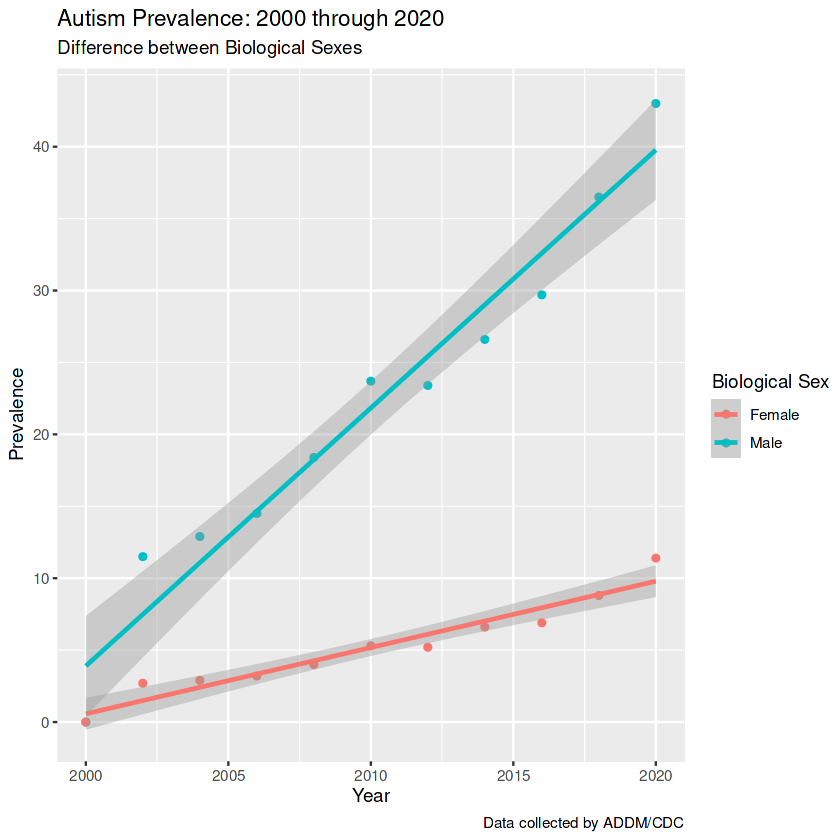

In [3]:
# To differentiate between biological sex prevalence in children (Historical)
ggplot(data=autism_prev) + 
  geom_point(mapping = aes(x=year,y=prevalence, color=biological_sex)) +
  geom_smooth(mapping = aes(x=year,y=prevalence, color=biological_sex), method=lm,na.rm = TRUE) +
  labs(title = "Autism Prevalence: 2000 through 2020", subtitle = "Difference between Biological Sexes", y="Prevalence", x="Year", caption = "Data collected by ADDM/CDC", color="Biological Sex")

**We also have data for various ethnic groups. Due to the limited quantity of data, proper trend analysis would be inconclusive at best (wrong at worst).  I will show the image but PLEASE remember this huge caveat.**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


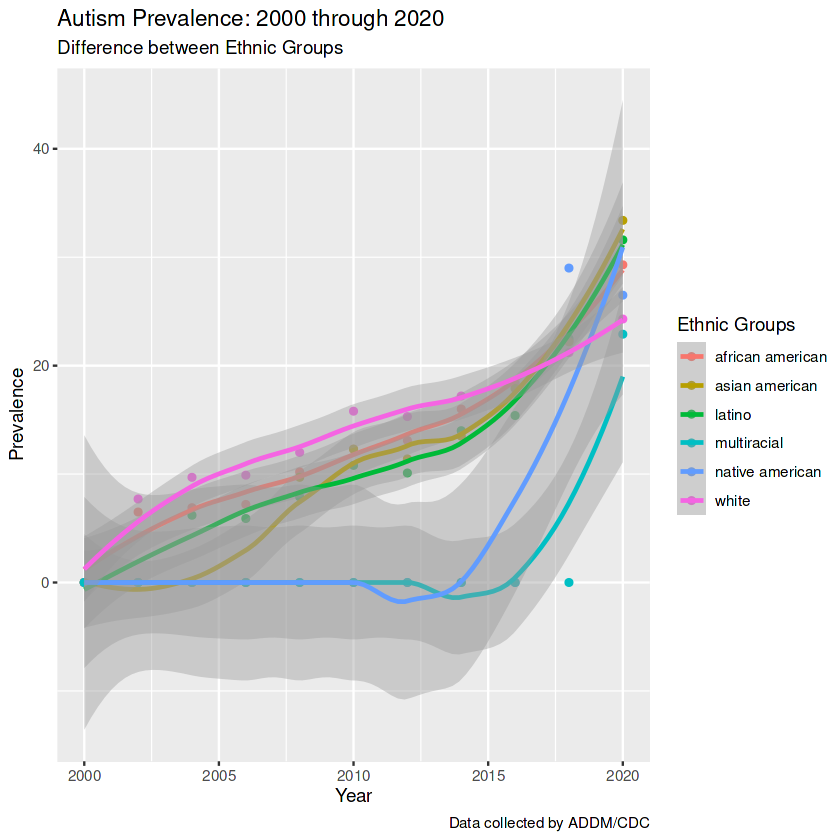

In [4]:
# To differentiate between ethnic group prevalence in children (Historical)
# due to the lack of data (for unrepresented groups) a smooth line was used to show exactly when data became available
ggplot(data=autism_prev_ethnic) + 
  geom_point(mapping = aes(x=year,y=prevalence, color=ethnic_group)) +
  geom_smooth(mapping = aes(x=year,y=prevalence, color=ethnic_group), na.rm = TRUE) +
  labs(title = "Autism Prevalence: 2000 through 2020", subtitle = "Difference between Ethnic Groups", y="Prevalence", x="Year", caption = "Data collected by ADDM/CDC", color="Ethnic Groups")

## <font color='plum'> Decision point </font>
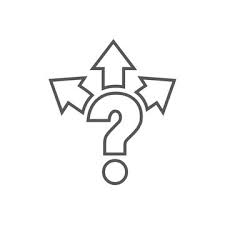

To move forward with national trend analysis - we are going to focus on trending based on biological sex rather than ethnic backgound.  There are too many data elements that could lead to incorrect conclusions when handling data based on ethnic background.  

<font color='plum'>**Conclusion 1**: 
Not enough data collection has been done across all Americans, the data we do have could be biased. The next steps here would be to reach out to advocacy groups to collect more data. </font>

## <font color='plum'> Trend analysis based on biological sex </font>

In order to move forward, I will use the historical data to determine how best to gain a trend analysis.
Based on the previous data, there is a trend for both biological sexes.

The next step is to isolate the data between male and female:

In [5]:
# Creating male and female specific data.frames
male_prev <- filter(autism_prev,biological_sex == "Male")
female_prev <- filter(autism_prev,biological_sex == "Female")

head(male_prev)
head(female_prev)

year,biological_sex,prevalence
<dbl>,<chr>,<dbl>
2000,Male,0.0
2002,Male,11.5
2004,Male,12.9
2006,Male,14.5
2008,Male,18.4
2010,Male,23.7


year,biological_sex,prevalence
<dbl>,<chr>,<dbl>
2000,Female,0.0
2002,Female,2.7
2004,Female,2.9
2006,Female,3.2
2008,Female,4.0
2010,Female,5.3


Due to data limitations, I am obligated to use the Random Walk Forecast function to get at the next 5 male and female values.

**<font color="red">THIS IS LESS THAN IDEAL</font>**

In [6]:
#install the forecast package
install.packages("forecast")
library(forecast)

# For Male estimates for the next 5 years:
rwf(male_prev$prevalence,h=5,drift=TRUE,level = c(80,95),fan = FALSE,lambda = NULL,biasadj = FALSE)

# For Female estimates for the next 5 years:
rwf(female_prev$prevalence,h=5,drift=TRUE,level = c(80,95),fan = FALSE,lambda = NULL,biasadj = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
12           47.3 42.73972 51.86028 40.32566 54.27434
13           51.6 44.86403 58.33597 41.29822 61.90178
14           55.9 47.31329 64.48671 42.76775 69.03225
15           60.2 49.91063 70.48937 44.46377 75.93623
16           64.5 52.59237 76.40763 46.28885 82.71115

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
12          12.54 11.18223 13.89777 10.46347 14.61653
13          13.68 11.67444 15.68556 10.61276 16.74724
14          14.82 12.26340 17.37660 10.91002 18.72998
15          15.96 12.89645 19.02355 11.27471 20.64529
16          17.10 13.55463 20.64537 11.67783 22.52217

year,biological_sex,prevalence
<dbl>,<chr>,<dbl>
2000,Male,0.0
2002,Male,11.5
2004,Male,12.9
2006,Male,14.5
2008,Male,18.4
2010,Male,23.7


`geom_smooth()` using formula = 'y ~ x'


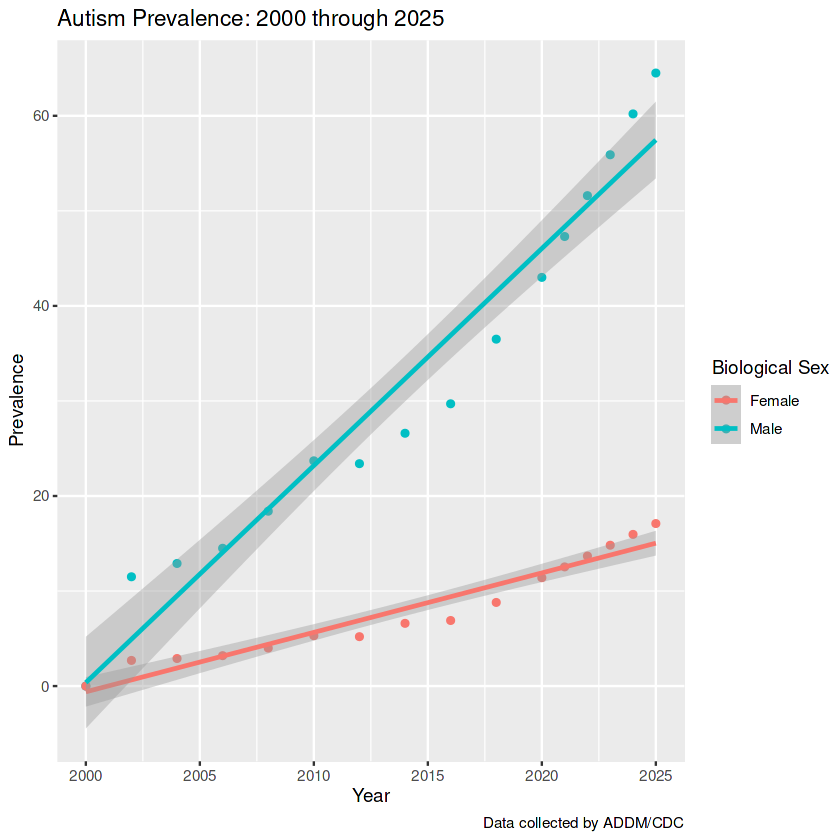

In [7]:
#current and future data
autism_future <- read_excel("/kaggle/input/autism-files/Prev_future.xlsx")
head(autism_future)

#current and future chart
ggplot(data=autism_future) + 
  geom_point(mapping = aes(x=year,y=prevalence, color=biological_sex)) +
  geom_smooth(mapping = aes(x=year,y=prevalence, color=biological_sex), method=lm) +
  labs(title = "Autism Prevalence: 2000 through 2025", y="Prevalence", x="Year", caption = "Data collected by ADDM/CDC", color="Biological Sex")

## <font color='plum'> Final Conclusions </font>

Previously stated:  
<font color='plum'>**Conclusion 1**: 
Not enough data collection has been done across all Americans, the data we do have could be biased. The next steps here would be to reach out to advocacy groups to collect more data. </font>

<font color='plum'>**Conclusion 2**: 
The data collection is limited across the board and using the drift in the Random Walk Forecast function is less than ideal.  Additional data sets are needed for this to be successful. </font>


As seen with the data, there is a lot to be desired.  There is spotty data collection by the CDC (and only in 18 states of the US).  As of this initial stab at the questions, 1-36 8 year old children are diagnosed as Autistic.  In no way is this data collection project handling "why are there so many new diagnoses being made?" but in preparation for the future, this makes a statement.

Many states deem an adult 22 years old or older.  At the rate that autism diagnoses are growing, many of the children diagnosed in 2002 will be aging into adulthood.  While they will no longer be in a public school, there will be additional need for state/federal assistance.


### <font color='plum'> Next Steps </font>
* Reach out to advocacy groups or locate additional ethnic group based data to continue analysis. (Either nationally or regionally)
* Work with other advocates to gather additional data to clean and get a better sense of the upcoming amount of autistic adults.

Sources:
[The Autism and Developmental Disabilities Monitoring (ADDM) Network (CDC.gov)](https://www.cdc.gov/ncbddd/autism/data/index.html#data)